In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

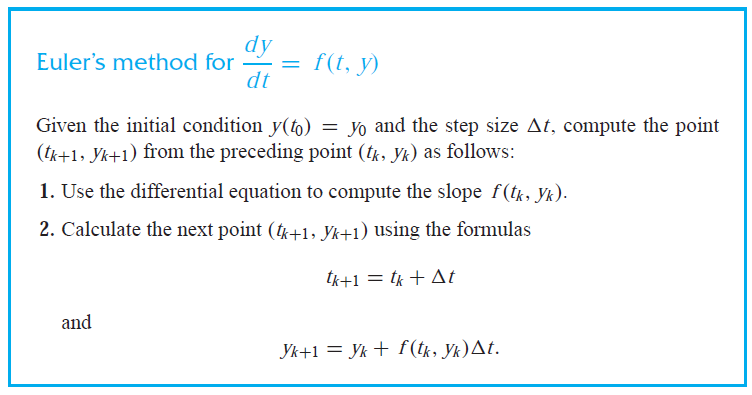
Euler

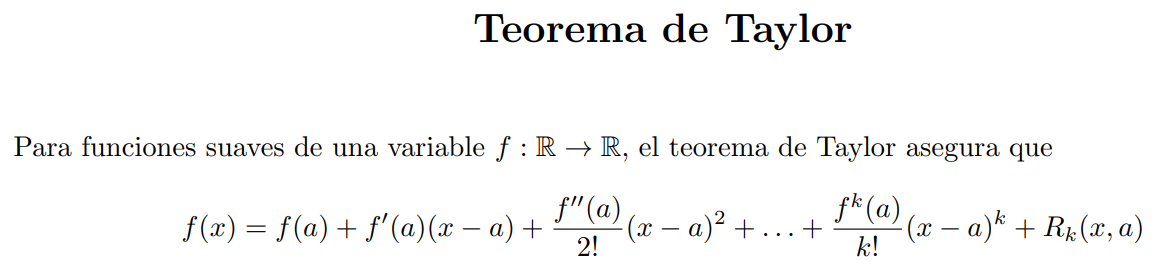
Taylor

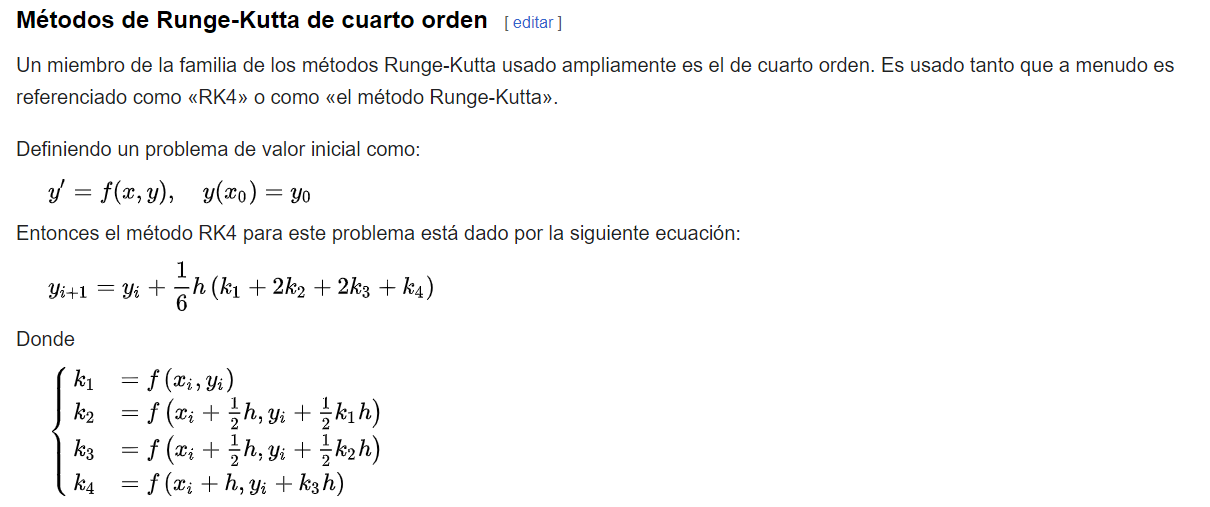
Runge Kutta

## y' = k*y*(1-y)-H

In [2]:
H = 0.4            #Cte que tiene que ser menor a k/4
def f(k,y0):
    return k*y0*(1-y0)-H

# def f(t,y0):
#     return y0*(1. + math.exp(-y0)) + math.exp(t)

## y'' = k(1-2y)y'

In [3]:
def fprima(k,y0):
    return k*(1-2*y0)*f(k,y0)

# def fprima(t,y0):
#     return f(t,y0)*(1. + math.exp(-y0) - y0*math.exp(-y0)) + math.exp(t)

In [4]:
#Aca se definen las funciones de k1 hasta k4 necesarias para el met de Runge Kutta
# como k1 = f 

def k1(t,y0):
    return f(t,y0)
    
def k2(t,y0,h):
    a = t + 1/2*h
    b = y0 + 1/2*k1(t,y0)*h
    return f(a,b)                        #k2 = f(a,b)  lol hice por partes para que sea mas facil de visualizar

def k3(t,y0,h):
    a = t + 1/2*h
    b = y0 + 1/2*k2(t,y0,h)*h
    return f(a,b)                        #k3 = f(a,b)  lol hice por partes para que sea mas facil de visualizar

def k4(t,y0,h):
    a = t + h
    b = y0 + k3(t,y0,h)*h
    return f(a,b)                        #k4 = f(a,b)  lol hice por partes para que sea mas facil de visualizar

def Runge_Kutta(t,y0,h):
    return y0 + 1/6*h*(k1(t,y0) + 2*k2(t,y0,h) + 2*k3(t,y0,h) + k4(t,y0,h))


In [5]:
#En este caso no se uso la solucion analitica, solo metodos numericos

k = 2.

t = 0.
h = 0.001         #Delta de tiempo
tmax = 4.

y1 = y2 = y3 = 0.4   #Entre 0 y 1

t_values = np.arange(t, tmax+h, h)  #Esto es la parte del tiempo, nos permite tener mas precision que si lo incluyeramos como una suma en el for

yE = []                           #Lista vacia donde se guardaran los datos del metodo de Euler
yT = []                           #Lista vacia donde se guardaran los datos del metodo de Taylor de segundo orden
yRK = []                          #Lista vacia donde se guardaran los datos del metodo de Runge Kutta de cuarto orden

for t in t_values:
    
    yE.append(y1)              #Metodo de Euler, lo uinico que se tiene que cambiar es la funcion f
    y1 = y1 + f(k,y1)*h         # la cual es la derivada con la que estamos trabajando

    yT.append(y2)                            #En el met de Taylor de segundo orden, necesitamos la primera y segunda derivada
    y2 = y2 + h*f(k,y2) + h*h/2*fprima(k,y2)

    yRK.append(y3)                            #En el met de Runge Kutta de cuart orden utilizamos la funcion definida arriba
    y3 = Runge_Kutta(k,y3,h)

p4 = pd.DataFrame({            #Aca se integran los valores de cada metodo en un DF
    'tk':t_values,
    'yE':yE,
    'yT':yT,
    'yRK':yRK
})

p4

,tk,yE,yT,yRK
0,0.000,0.400000,0.400000,0.400000
1,0.001,0.400080,0.400080,0.400080
2,0.002,0.400160,0.400160,0.400160
3,0.003,0.400240,0.400240,0.400241
4,0.004,0.400320,0.400320,0.400321
...,...,...,...,...
3997,3.997,0.693062,0.693048,0.693237
3998,3.998,0.693088,0.693073,0.693262
3999,3.999,0.693113,0.693099,0.693287
4000,4.000,0.693139,0.693124,0.693313


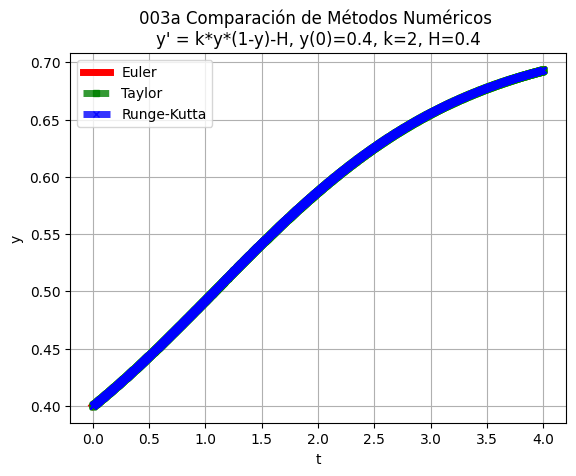

In [6]:
desde = 0.
hasta = tmax
p4_filtered = p4[(p4['tk'] >= desde) & (p4['tk'] <= hasta)]

plt.plot(p4_filtered['tk'], p4_filtered['yE'], label='Euler', linestyle='-', color='red', marker='o', markersize=4, linewidth=5)
plt.plot(p4_filtered['tk'], p4_filtered['yT'], label='Taylor', linestyle='--', color='green', marker='s', markersize=4, linewidth=5, alpha=0.8)
plt.plot(p4_filtered['tk'], p4_filtered['yRK'], label='Runge-Kutta', linestyle='-.', color='blue', marker='x', markersize=4, linewidth=5, alpha=0.8)
plt.xlabel('t')
plt.ylabel('y')
plt.title('''003a Comparación de Métodos Numéricos 
y' = k*y*(1-y)-H, y(0)=0.4, k=2, H=0.4''')
plt.legend()
plt.grid(True)
plt.savefig('003a_Grafico_comparacion.jpg', format='jpg', dpi=150)  # dpi ajusta la resolucion
plt.show()

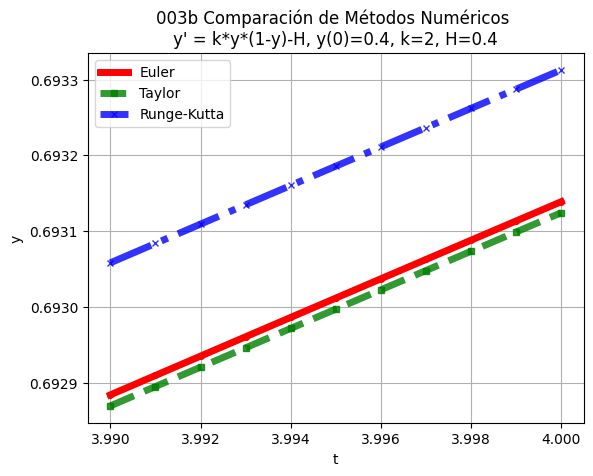

In [7]:
desde = tmax - h*10
hasta = tmax
p4_filtered = p4[(p4['tk'] >= desde) & (p4['tk'] <= hasta)]

plt.plot(p4_filtered['tk'], p4_filtered['yE'], label='Euler', linestyle='-', color='red', marker='o', markersize=4, linewidth=5)
plt.plot(p4_filtered['tk'], p4_filtered['yT'], label='Taylor', linestyle='--', color='green', marker='s', markersize=4, linewidth=5, alpha=0.8)
plt.plot(p4_filtered['tk'], p4_filtered['yRK'], label='Runge-Kutta', linestyle='-.', color='blue', marker='x', markersize=4, linewidth=5, alpha=0.8)
plt.xlabel('t')
plt.ylabel('y')
plt.title('''003b Comparación de Métodos Numéricos 
y' = k*y*(1-y)-H, y(0)=0.4, k=2, H=0.4''')
plt.legend()
plt.grid(True)
plt.savefig('003b_Grafico_comparacion.jpg', format='jpg', dpi=150)  # dpi ajusta la resolucion
plt.show()

In [8]:
p4_filtered

,tk,yE,yT,yRK
3990,3.990,0.692884,0.692869,0.693058
3991,3.991,0.692909,0.692895,0.693084
3992,3.992,0.692935,0.692920,0.693109
3993,3.993,0.692960,0.692946,0.693135
3994,3.994,0.692986,0.692971,0.693160
3995,3.995,0.693012,0.692997,0.693186
3996,3.996,0.693037,0.693022,0.693211
3997,3.997,0.693062,0.693048,0.693237
3998,3.998,0.693088,0.693073,0.693262
3999,3.999,0.693113,0.693099,0.693287


In [9]:
p4.yRK.max()

np.float64(0.6933380699592768)